In [73]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

### [ISL] EX 13
In this exercise you will create some simulated data and will fit simple linear regression models to it.


Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

In [74]:
np.random.seed(1)

In [75]:
def gen_data(eps_var=0.25, obs_num=100):
    # (a) vector - 100 obs, N(0,1) distribution
    x = np.sort(np.random.normal(0, 1, (obs_num)))
    # (b) vector - 100 obs, N(0, eps_var)
    eps = np.random.normal(0, eps_var, (obs_num))
    # (c) 
    y = -1 + 0.5 * x + eps
    return x, y

In [76]:
x1, y1 = gen_data()

In [77]:
print('What is the length of the vector y?', len(y1))

print('What are the values of β0 and β1 in this linear model?', 'β0 = ' + str(-1), 'β0 = ' + str(0.5))

What is the length of the vector y? 100
What are the values of β0 and β1 in this linear model? β0 = -1 β0 = 0.5


(d) **Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.**

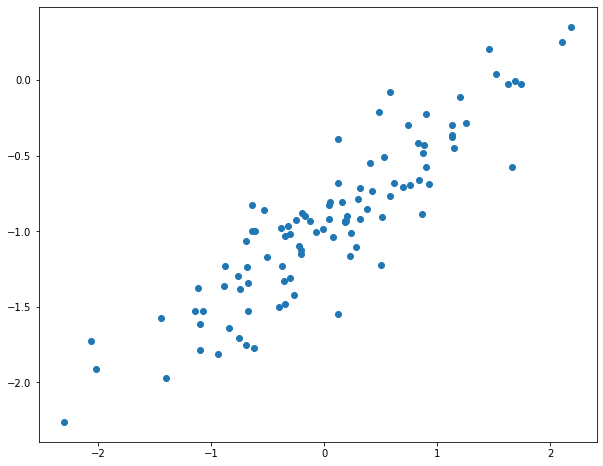

In [78]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, y1)

(e) **Fit a least squares linear model to predict y using x.**

In [79]:
line_fit_1 = sm.OLS(y1, sm.add_constant(x1)).fit()

**Comment
on the model obtained. How do βˆ0 and βˆ1 compare to β0 and
β1?**


In [80]:
print(line_fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     417.8
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           4.05e-37
Time:                        16:16:00   Log-Likelihood:                 4.8238
No. Observations:                 100   AIC:                            -5.648
Df Residuals:                      98   BIC:                           -0.4372
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9641      0.023    -41.296      0.0

(f) **Display the least squares line on the scatterplot.
Draw the population regression line on the plot, in a different
color**

In [81]:
predicted_y_1 = line_fit_1.params[0] + x1 * line_fit_1.params[1]
real_y_1 = -1 + x1 * 0.5

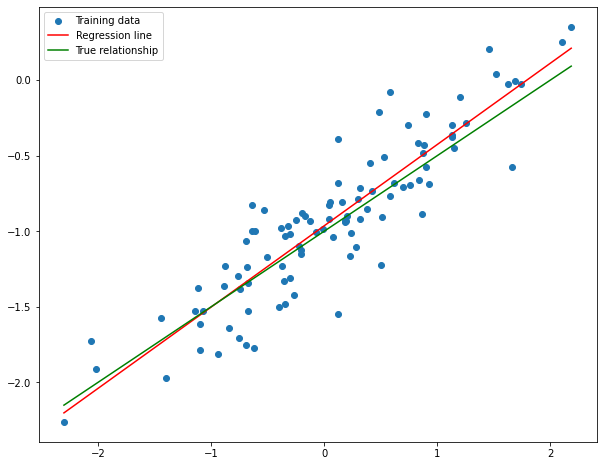

In [82]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, y1, label="Training data")
ax.plot(x1, predicted_y_1, c="red", label="Regression line")
ax.plot(x1, real_y_1, c="green", label="True relationship")
ax.legend()

(g) **Now fit a polynomial regression model that predicts y using x
and x2. Is there evidence that the quadratic term improves the
model fit? Explain your answer.**

In [83]:
square_fit = smf.ols(formula="y ~ x + np.power(x, 2)", data={"y": y1, "x": x1}).fit()

In [84]:
print(square_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     209.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           6.41e-36
Time:                        16:16:00   Log-Likelihood:                 5.3263
No. Observations:                 100   AIC:                            -4.653
Df Residuals:                      97   BIC:                             3.163
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.9803      0.029    -34.

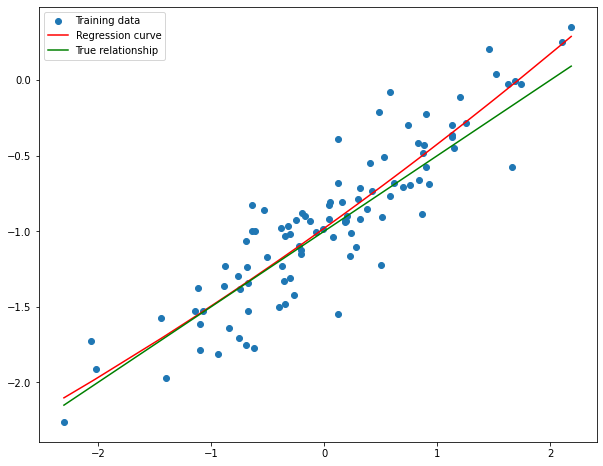

In [85]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x1, y1, label="Training data")
ax.plot(x1, square_fit.fittedvalues, c="red", label="Regression curve")
ax.plot(x1, real_y_1, c="green", label="True relationship")
ax.legend()

(h) **Modify the data generation process in
such a way that there is less noise in the data**

In [86]:
x2,y2 = gen_data(eps_var=0.1)

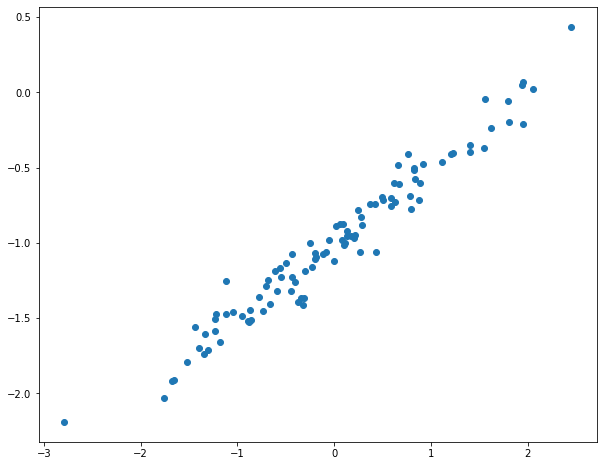

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x2, y2)

In [88]:
line_fit_2 = sm.OLS(y2, sm.add_constant(x2)).fit()

In [89]:
print(line_fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2148.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.86e-68
Time:                        16:16:00   Log-Likelihood:                 82.219
No. Observations:                 100   AIC:                            -160.4
Df Residuals:                      98   BIC:                            -155.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0020      0.011    -93.275      0.0

In [90]:
predicted_y_2 = line_fit_2.params[0] + x2 * line_fit_2.params[1]
real_y_2 = -1 + x2 * 0.5

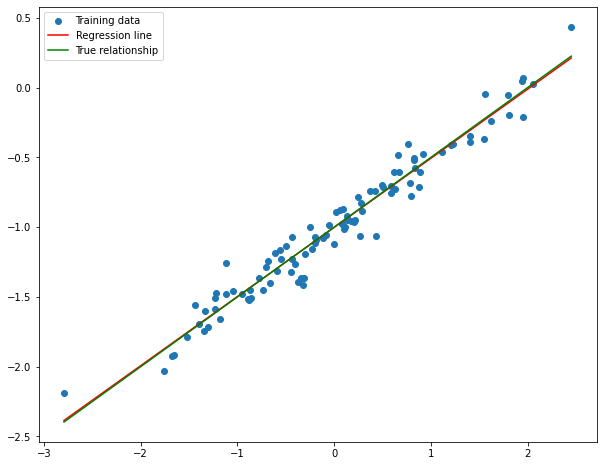

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x2, y2, label="Training data")
ax.plot(x2, predicted_y_2, c="red", label="Regression line")
ax.plot(x2, real_y_2, c="green", label="True relationship")
ax.legend()

(i) **Modify the data generation process in
such a way that there is more noise in the data**

In [92]:
x3,y3 = gen_data(eps_var=0.4)

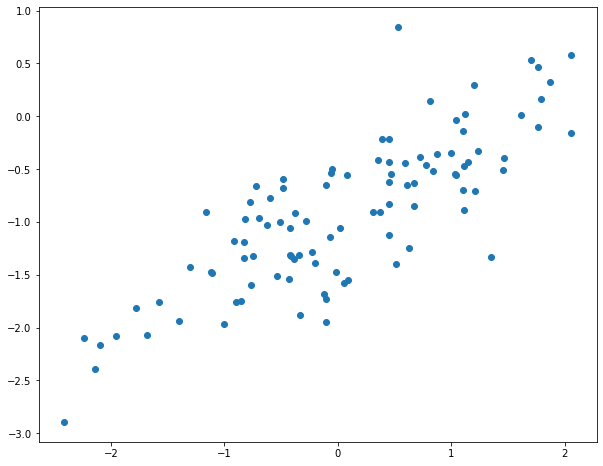

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x3, y3)

In [94]:
line_fit_3 = sm.OLS(y3, sm.add_constant(x3)).fit()

In [95]:
print(line_fit_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sun, 11 Dec 2022   Prob (F-statistic):           1.06e-24
Time:                        16:16:01   Log-Likelihood:                -53.468
No. Observations:                 100   AIC:                             110.9
Df Residuals:                      98   BIC:                             116.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9534      0.042    -22.807      0.0

In [96]:
predicted_y_3 = line_fit_3.params[0] + x3 * line_fit_3.params[1]
real_y_3 = -1 + x3 * 0.5

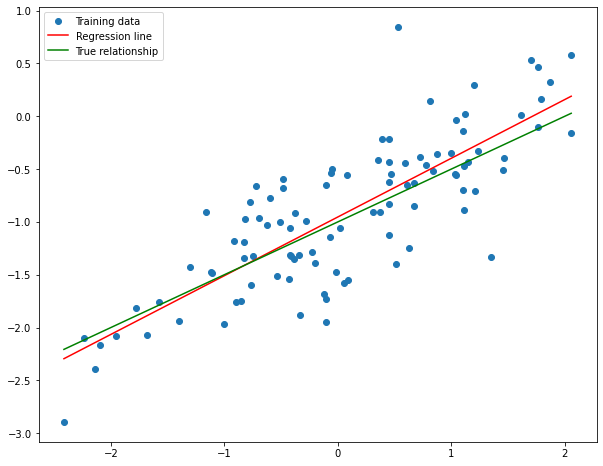

In [97]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x3, y3, label="Training data")
ax.plot(x3, predicted_y_3, c="red", label="Regression line")
ax.plot(x3, real_y_3, c="green", label="True relationship")
ax.legend()

(j) **What are the confidence intervals for β0 and β0 based on the
original data set, the noisier data set, and the less noisy data
set?**

In [98]:
line_fit_1.conf_int()

array([[-1.01042485, -0.91776549],
       [ 0.48564479,  0.59008182]])

In [99]:
line_fit_2.conf_int()

array([[-1.02330825, -0.98067278],
       [ 0.47413163,  0.51655564]])

In [100]:
line_fit_3.conf_int()

array([[-1.03631295, -0.87040417],
       [ 0.47590913,  0.63581279]])